# 3. TrainPredict_Mix3model0
## Result:
- Kaggle score:

## Tensorboard:
- Input at command: tensorboard --logdir=./log
- Input at browser: http://127.0.0.1:6006

## Reference:
- https://www.kaggle.com/codename007/a-very-extensive-landmark-exploratory-analysis


## Run name

In [1]:
import time

project_name = 'ic_furniture2018'
step_name = 'TrainPredict_Mix3model'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)
t0 = time.time()

run_name: ic_furniture2018_TrainPredict_Mix3model_20180429_112205


## Import params

In [2]:
epochs = 15
print('epochs: ', epochs)

epochs:  15


## Import PKGs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from IPython.display import display

import os
import gc
import zipfile
import pickle
import math
from PIL import Image
import shutil

from tqdm import tqdm
from multiprocessing import cpu_count

from sklearn.metrics import confusion_matrix, accuracy_score

## Important Params

In [4]:
batch_size = 1024

## Project folders

In [5]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
feature_folder = os.path.join(cwd, 'feature')
post_pca_feature_folder = os.path.join(cwd, 'post_pca_feature')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t%s' % input_folder)
print('output_folder: \t\t\t%s' % output_folder)
print('model_folder: \t\t\t%s' % model_folder)
print('feature_folder: \t\t%s' % feature_folder)
print('post_pca_feature_folder: \t%s' % post_pca_feature_folder)
print('log_folder: \t\t\t%s' % log_folder)

org_train_folder = os.path.join(input_folder, 'org_train')
org_val_folder = os.path.join(input_folder, 'org_val')
org_test_folder = os.path.join(input_folder, 'org_test')
train_folder = os.path.join(input_folder, 'data_train')
val_folder = os.path.join(input_folder, 'data_val')
test_folder = os.path.join(input_folder, 'data_test')
test_sub_folder = os.path.join(test_folder, 'test')

if not os.path.exists(post_pca_feature_folder):
    os.mkdir(post_pca_feature_folder)
    print('Create folder: %s' % post_pca_feature_folder)

train_json_file = os.path.join(input_folder, 'train.json')
val_json_file = os.path.join(input_folder, 'validation.json')
test_json_file = os.path.join(input_folder, 'test.json')
print('\ntrain_json_file: \t\t%s' % train_json_file)
print('val_json_file: \t\t\t%s' % val_json_file)
print('test_json_file: \t\t%s' % test_json_file)

train_csv_file = os.path.join(input_folder, 'train.csv')
val_csv_file = os.path.join(input_folder, 'validation.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
print('\ntrain_csv_file: \t\t%s' % train_csv_file)
print('val_csv_file: \t\t\t%s' % val_csv_file)
print('test_csv_file: \t\t\t%s' % test_csv_file)

sample_submission_csv_file = os.path.join(input_folder, 'sample_submission_randomlabel.csv')
print('\nsample_submission_csv_file: \t%s' % sample_submission_csv_file)

input_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input
output_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/output
model_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/model
feature_folder: 		/data1/kaggle/imaterialist-challenge-furniture-2018/feature
post_pca_feature_folder: 	/data1/kaggle/imaterialist-challenge-furniture-2018/post_pca_feature
log_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/log

train_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.json
val_json_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.json
test_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.json

train_csv_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.csv
val_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.csv
test_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.csv


## Preview data

In [6]:
train_csv = pd.read_csv(train_csv_file)
print('train_csv.shape is {0}.'.format(train_csv.shape))
display(train_csv.head(2))

val_csv = pd.read_csv(val_csv_file)
print('val_csv.shape is {0}.'.format(val_csv.shape))
display(val_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

sample_submission_csv = pd.read_csv(sample_submission_csv_file)
print('sample_submission_csv.shape is {0}.'.format(sample_submission_csv.shape))
display(sample_submission_csv.head(2))

train_csv.shape is (194828, 3).


,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...


val_csv.shape is (6400, 3).


,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


sample_submission_csv.shape is (12800, 2).


,id,predicted
0,1,57
1,2,74


In [7]:
train_id = train_csv['image_id']
train_label_id = train_csv['label_id']

id_2_train_label_id_dict = dict(zip(train_id, train_label_id))
print('len(id_2_train_label_id_dict)=%d' % len(id_2_train_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))

image_file = '%s_%s.jpg' % (train_id[index], id_2_train_label_id_dict[train_id[index]])
print(image_file)

len(id_2_train_label_id_dict)=194828
id: 1, 	landmark_id:5
id: 2, 	landmark_id:5
2_5.jpg


In [8]:
val_id = val_csv['image_id']
val_label_id = val_csv['label_id']

id_2_val_label_id_dict = dict(zip(val_id, val_label_id))
print('len(id_2_val_label_id_dict)=%d' % len(id_2_val_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))

image_file = '%s_%s.jpg' % (val_id[index], id_2_val_label_id_dict[val_id[index]])
print(image_file)

len(id_2_val_label_id_dict)=6400
id: 1, 	landmark_id:38
id: 2, 	landmark_id:63
2_63.jpg


In [9]:
test_id = test_csv['image_id']

index = 0
print('id: %s' % (test_id[index]))
index = 1
print('id: %s' % (test_id[index]))

image_file = '%s.jpg' % (test_id[index])
print(image_file)

id: 1
id: 2
2.jpg


## Load feature

In [10]:
%%time
import h5py
import numpy as np
np.random.seed(2018)


def load_h5_data(data_str, feature_folder, file_reg, model_name, time_str):
    x_data = {}
    y_data = {}
    
    feature_model = os.path.join(feature_folder, file_reg % (model_name, time_str))
    for filename in [feature_model]:
        with h5py.File(filename, 'r') as h:
            x_data = np.array(h[data_str])
            y_data = np.array(h['%s_labels' % data_str])
    return x_data, y_data

def load_h5_test(feature_folder, file_reg, model_name, time_str):
    x_test = {}
    
    feature_model = os.path.join(feature_folder, file_reg % (model_name, time_str))
    for filename in [feature_model]:
        with h5py.File(filename, 'r') as h:
            x_test = np.array(h['test'])
    return x_test

CPU times: user 68 ms, sys: 12 ms, total: 80 ms
Wall time: 96.7 ms


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
def is_files_existed(feature_folder, file_reg, model_names, time_strs):
    for model_name in model_names:
        for time_str in time_strs:
            file_name = file_reg % (model_name, time_str)
            file_path = os.path.join(feature_folder, file_name)
            if not os.path.exists(file_path):
                print('File not existed: %s' % file_path)
                return False
            else:
                print('File existed: %s' % file_path)
    return True

# Test
file_reg = 'feature_%s_%s.h5'
model_names = [
#     'MobileNet', 
#     'VGG16',
#     'VGG19',
#     'ResNet50',
#     'DenseNet121',
#     'DenseNet169',
#     'DenseNet201',
    'Xception',
    'InceptionV3',
    'InceptionResNetV2'
]
time_strs = [
    '300_20180415-150022',
    '200_20180415-140848',
    '150_20180415-131901',
    '300_20180415-111333',   
    
    '450_20180409-115039',
    '450_20180409-191753',
    '450_20180410-032144',
    '450_20180410-112448',
    '450_20180410-193018',
    
    '20180331-163122',
    '20180401-185347',
    '20180401-224426',
    '20180402-023138',
    '20180402-062014',
    '20180402-101021',
    '20180402-140156',
    '20180402-175506',
    '20180402-214919',
    '20180403-014551',
    
    '20180406-070324',
    '20180406-102130',
    '20180406-123522',
    '20180406-144857',
    
    '150_20180406-230352',
    '150_20180407-010446',
    '150_20180407-031951',
    '150_20180407-053509',
    '150_20180407-075132',
    '150_20180407-100849',
    '150_20180407-122723',
    '150_20180407-144712',
    '150_20180407-170832',
    '150_20180407-193230'
]

print('*'*100)
print(is_files_existed(feature_folder, file_reg, model_names, time_strs))


def time_str_generator(time_strs):
    while(1):
        for time_str in time_strs:
            print('  ' + time_str)
            yield time_str
            
# Test
time_str_gen = time_str_generator(time_strs)
for i in range(len(time_strs)):
    next(time_str_gen)

****************************************************************************************************
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_300_20180415-150022.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_200_20180415-140848.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_150_20180415-131901.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_300_20180415-111333.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180409-115039.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180409-191753.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180410-032144.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_201804

In [12]:
%%time
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

def load_time_str_feature_data(data_str, feature_folder, file_reg, model_names, time_str):
    x_data_time_strs = []
    y_data_time_strs = None
    for model_name in model_names:
        x_data_time_str, y_data_time_str = load_h5_data(data_str, feature_folder, file_reg, model_name, time_str)
        # Around data to 3 decimals to calculate computation
        x_data_time_str = np.round(x_data_time_str, decimals=3)
        x_data_time_strs.append(x_data_time_str)
        y_data_time_strs = y_data_time_str
    x_data_time_strs = np.concatenate(x_data_time_strs, axis=-1)
#     print(x_data_time_strs.shape)
#     print(y_data_time_strs.shape)
    return x_data_time_strs, y_data_time_strs

def data_generator_folder(data_str, feature_folder, file_reg, model_names, time_strs, batch_size, num_classes):
    assert is_files_existed(feature_folder, file_reg, model_names, time_strs)

    time_str_gen = time_str_generator(time_strs)
    x_data, y_data = load_time_str_feature_data(data_str, feature_folder, file_reg, model_names, next(time_str_gen))
#     x_data, y_data = shuffle(x_data, y_data, random_state=2018)
    x_data, y_data = shuffle(x_data, y_data, random_state=None)
    len_x_data = len(x_data)
    start_index = 0
    end_index = 0
    while(1):
        end_index = start_index + batch_size
        if end_index < len_x_data:
#             print(start_index, end_index, end=' ')
            x_batch = x_data[start_index: end_index, :]
            y_batch = y_data[start_index: end_index]
            y_batch_cat = to_categorical(y_batch, num_classes)
            
            start_index = start_index + batch_size
#             print(x_batch.shape, y_batch_cat.shape)
            yield x_batch, y_batch_cat
        else:
            end_index = end_index-len_x_data
#             print(start_index, end_index, end=' ')
            x_data_old = np.array(x_data[start_index:, :], copy=True)
            y_data_old = np.array(y_data[start_index:], copy=True)
            # Load new datas
            x_data, y_data = load_time_str_feature_data(data_str, feature_folder, file_reg, model_names, next(time_str_gen))
#             x_data, y_data = shuffle(x_data, y_data, random_state=2018)
            x_data, y_data = shuffle(x_data, y_data, random_state=None)
            len_x_data = len(x_data)
            gc.collect()
            x_batch = np.vstack((x_data_old, x_data[:end_index, :]))
            y_batch = np.concatenate([y_data_old, y_data[:end_index]])
            y_batch_cat = to_categorical(y_batch, num_classes)
            
            start_index = end_index
#             print(x_batch.shape, y_batch_cat.shape)
            yield x_batch, y_batch_cat
        
    
# x_train = np.concatenate([x_train_Xception, x_train_InceptionV3, x_train_InceptionResNetV2], axis=-1)

num_classes = len(list(set(train_label_id)))
print('num_classes: %s' % num_classes)

# Test
file_reg = 'feature_%s_%s.h5'
model_names = [
#     'MobileNet', 
#     'VGG16',
#     'VGG19',
#     'ResNet50',
#     'DenseNet121',
#     'DenseNet169',
#     'DenseNet201',
    'Xception',
    'InceptionV3',
    'InceptionResNetV2'
]
time_strs = [
#     '300_20180415-150022',
#     '200_20180415-140848',
#     '150_20180415-131901',
#     '300_20180415-111333',

    '450_20180409-115039',
    '450_20180409-191753',
    '450_20180410-032144',
    '450_20180410-112448',
    '450_20180410-193018',
    
#     '20180331-163122',
#     '20180401-185347',
#     '20180401-224426',
#     '20180402-023138',
#     '20180402-062014',
#     '20180402-101021',
#     '20180402-140156',
#     '20180402-175506',
#     '20180402-214919',
#     '20180403-014551',
    
#     '20180406-070324',
#     '20180406-102130',
#     '20180406-123522',
#     '20180406-144857',
    
#     '150_20180406-230352',
#     '150_20180407-010446',
#     '150_20180407-031951',
#     '150_20180407-053509',
#     '150_20180407-075132',
#     '150_20180407-100849',
#     '150_20180407-122723',
#     '150_20180407-144712',
#     '150_20180407-170832',
#     '150_20180407-193230'
]

print('*' * 80)
len_train_csv = train_csv.shape[0]
steps_per_epoch_train = int(len_train_csv/batch_size) * len(time_strs)
print('len(train_data): %s' % len_train_csv)
print('batch_size: %s' % batch_size)
print('steps_per_epoch_train: %s' % steps_per_epoch_train)

train_gen = data_generator_folder('train', feature_folder, file_reg, model_names, time_strs, batch_size, num_classes)
batch_data = next(train_gen)
print(batch_data[0].shape, batch_data[1].shape)
batch_data = next(train_gen)
print(batch_data[0].shape, batch_data[1].shape)
# for i in range(steps_per_epoch_train*5):
#     next(train_gen)

print('*' * 80)
len_val_csv = val_csv.shape[0]
steps_per_epoch_val = int(len_val_csv/batch_size)
print('len(val_data): %s' % len_val_csv)
print('batch_size: %s' % batch_size)
print('steps_per_epoch_val: %s' % steps_per_epoch_val)
val_gen = data_generator_folder('val', feature_folder, file_reg, model_names, time_strs, batch_size, num_classes)
batch_data = next(val_gen)
print(batch_data[0].shape, batch_data[1].shape)
batch_data = next(val_gen)
print(batch_data[0].shape, batch_data[1].shape)

data_dim = batch_data[0].shape[1]
print('data_dim: %s' % data_dim)

print('*' * 80)
x_train, y_train = load_time_str_feature_data('train', feature_folder, file_reg, model_names, time_strs[0])
x_val, y_val = load_time_str_feature_data('val', feature_folder, file_reg, model_names, time_strs[0])
print(x_train.shape)
print(len(y_train))
print(x_val.shape)
print(len(y_val))

Using TensorFlow backend.


num_classes: 128
********************************************************************************
len(train_data): 194828
batch_size: 1024
steps_per_epoch_train: 950
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180409-115039.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180409-191753.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180410-032144.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180410-112448.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_Xception_450_20180410-193018.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_InceptionV3_450_20180409-115039.h5
File existed: /data1/kaggle/imaterialist-challenge-furniture-2018/feature/feature_InceptionV3_450_20180409-191753.h5
File existed: /data1/kaggle/im

In [13]:
def load_time_str_feature_test(feature_folder, file_reg, model_names, time_str):
    x_test_time_strs = []
    for model_name in model_names:
        file_name = file_reg % (model_name, time_str)
        file_path = os.path.join(feature_folder, file_name)
        x_test_time_str = load_h5_test(feature_folder, file_reg, model_name, time_str)
        x_test_time_str = np.round(x_test_time_str, decimals=3)
        x_test_time_strs.append(x_test_time_str)
    x_test_time_strs = np.concatenate(x_test_time_strs, axis=-1)
#     print(x_test_time_strs.shape)
    return x_test_time_strs

x_test = load_time_str_feature_test(feature_folder, file_reg, model_names, time_strs[0])
print(x_test.shape)

(12652, 5632)


## Build NN

In [14]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LSTM
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard, EarlyStopping

In [15]:
def get_lr(x):
#     lr = round(3e-4 * 0.96 ** x, 6)
    if x <= 10:
        lr = 3e-4
    
    if x <= 15:
        lr = 1e-4
    else:
        lr = 5e-5

#     lr = 3e-4
    print(lr, end='  ')
    return lr

for i in range(epochs):
    print(get_lr(i), end=' ')
# annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
annealer = LearningRateScheduler(get_lr)

# early_stop = EarlyStopping(monitor='acc', min_delta=0.001, patience=0.0005, verbose=0, mode='auto')

log_dir = os.path.join(log_folder, run_name)
print('\nlog_dir:' + log_dir)
tensorBoard = TensorBoard(log_dir=log_dir)

callbacks = []
# callbacks = [early_stop]

0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 0.0001  0.0001 
log_dir:/data1/kaggle/imaterialist-challenge-furniture-2018/log/ic_furniture2018_TrainPredict_Mix3model_20180429_112205


In [16]:
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(Dense(1024, input_shape=(data_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              5768192   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
Total para

In [17]:
cpu_amount = cpu_count()
print(cpu_amount)

8


In [18]:
%%time
hist = model.fit_generator(train_gen,
    steps_per_epoch=steps_per_epoch_train,
    epochs=epochs, #Increase this when not on Kaggle kernel
    verbose=1,  #1 for ETA, 0 for silent
    callbacks=callbacks,
    max_queue_size=batch_size,
    workers=cpu_amount,
    use_multiprocessing=False,
    validation_data=val_gen,
    validation_steps=steps_per_epoch_val)

Epoch 1/15
  450_20180409-191753
949/950 [============================>.] - ETA: 0s - loss: 1.2169 - acc: 0.6662  450_20180409-191753
  450_20180410-032144
  450_20180410-112448
950/950 [==============================] - 823s 866ms/step - loss: 1.2164 - acc: 0.6663 - val_loss: 0.9011 - val_acc: 0.7396
Epoch 2/15
947/950 [============================>.] - ETA: 2s - loss: 0.8226 - acc: 0.7571  450_20180410-193018
  450_20180409-115039
  450_20180409-191753
950/950 [==============================] - 921s 970ms/step - loss: 0.8219 - acc: 0.7573 - val_loss: 1.0111 - val_acc: 0.7096
Epoch 3/15
949/950 [============================>.] - ETA: 0s - loss: 0.7076 - acc: 0.7868  450_20180410-032144
  450_20180410-112448
  450_20180410-193018
950/950 [==============================] - 69s 73ms/step - loss: 0.7075 - acc: 0.7868 - val_loss: 0.9648 - val_acc: 0.7277
Epoch 4/15
949/950 [============================>.] - ETA: 0s - loss: 0.6335 - acc: 0.8060  450_20180409-115039
  450_20180409-191753
  4

948/950 [============================>.] - ETA: 1s - loss: 0.3986 - acc: 0.8713  450_20180409-191753
  450_20180410-032144
  450_20180410-112448
950/950 [==============================] - 584s 615ms/step - loss: 0.3985 - acc: 0.8713 - val_loss: 0.7214 - val_acc: 0.7998
Epoch 12/15
949/950 [============================>.] - ETA: 0s - loss: 0.3811 - acc: 0.8764  450_20180410-193018
  450_20180409-115039
  450_20180409-191753
950/950 [==============================] - 69s 72ms/step - loss: 0.3811 - acc: 0.8764 - val_loss: 0.9846 - val_acc: 0.7415
Epoch 13/15
949/950 [============================>.] - ETA: 0s - loss: 0.3637 - acc: 0.8817  450_20180410-032144
  450_20180410-112448
  450_20180410-193018
950/950 [==============================] - 463s 487ms/step - loss: 0.3637 - acc: 0.8817 - val_loss: 0.9505 - val_acc: 0.7498
Epoch 14/15
949/950 [============================>.] - ETA: 0s - loss: 0.3491 - acc: 0.8856  450_20180409-115039
  450_20180409-191753
  450_20180410-032144
950/950 [==

In [19]:
final_loss, final_acc = model.evaluate_generator(val_gen, steps=steps_per_epoch_val * len(time_strs))
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

  450_20180409-191753
  450_20180410-032144
  450_20180410-112448
  450_20180410-193018
  450_20180409-115039
  450_20180409-191753
Final loss: 0.9117, final accuracy: 0.7595


In [20]:
run_name_acc = run_name + '_' + str(int(final_acc*10000)).zfill(4)
print(run_name_acc)

ic_furniture2018_TrainPredict_Mix3model_20180429_112205_7594


In [21]:
histories = pd.DataFrame(hist.history)
histories['epoch'] = hist.epoch
print(histories.columns)
histories_file = os.path.join(model_folder,  'hist_%s.csv' % run_name_acc)
histories.to_csv(histories_file, index=False)

Index(['acc', 'loss', 'val_acc', 'val_loss', 'epoch'], dtype='object')


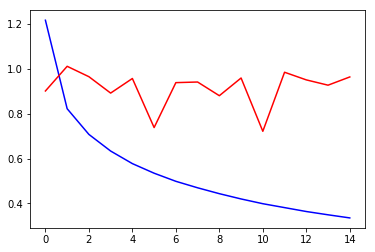

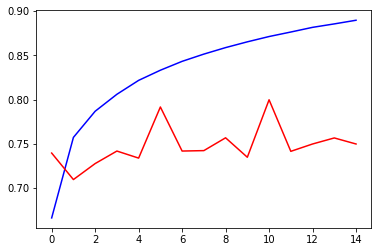

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [23]:
def save_network(model, run_name):
    cwd = os.getcwd()
    modelPath = os.path.join(cwd, 'model')
    if not os.path.isdir(modelPath):
        os.mkdir(modelPath)
    weigthsFile = os.path.join(modelPath, run_name + '.h5')
    model.save(weigthsFile)
save_network(model, run_name_acc)

## Predict

In [24]:
%%time
y_train_proba = model.predict(x_train)
print(y_train_proba.shape)
y_train_pred = np.argmax(y_train_proba, -1)
print(y_train_pred.shape)
print(accuracy_score(y_train, y_train_pred))

(191261, 128)
(191261,)
0.9311203015774256
CPU times: user 9.26 s, sys: 3.6 s, total: 12.9 s
Wall time: 8.93 s


In [25]:
%%time
y_val_proba = model.predict(x_val)
print(y_val_proba.shape)
y_val_pred = np.argmax(y_val_proba, -1)
print(y_val_pred.shape)
print(accuracy_score(y_val, y_val_pred))

(6301, 128)
(6301,)
0.8066973496270433
CPU times: user 304 ms, sys: 112 ms, total: 416 ms
Wall time: 286 ms


In [26]:
%%time
y_test_proba = model.predict(x_test)
print(y_test_proba.shape)
y_test_pred = np.argmax(y_test_proba, -1)
print(y_test_pred.shape)

(12652, 128)
(12652,)
CPU times: user 636 ms, sys: 216 ms, total: 852 ms
Wall time: 588 ms


In [27]:
# 这里证明os.listdir()得到的图片名称list不正确
files = os.listdir(os.path.join(test_folder, 'test'))
print(files[:10])

# 这里证明ImageDataGenerator()得到的图片名称list才是正确
gen = ImageDataGenerator()
image_size = (299, 299)
test_generator  = gen.flow_from_directory(test_folder, image_size, shuffle=False, batch_size=batch_size)
print('test_generator')
print(len(test_generator.filenames))

['7349.jpg', '8809.jpg', '6409.jpg', '5631.jpg', '9579.jpg', '7198.jpg', '6107.jpg', '10190.jpg', '5354.jpg', '10962.jpg']
Found 12652 images belonging to 1 classes.
test_generator
12652


In [28]:
def save_proba(y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames, file_name):
    test_filenames = [n.encode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    if os.path.exists(file_name):
        os.remove(file_name)
        print('File removed: \t%s' % file_name)
    with h5py.File(file_name) as h:
        h.create_dataset('y_train_proba', data=y_train_proba)
        h.create_dataset('y_train', data=y_train)
        h.create_dataset('y_val_proba', data=y_val_proba)
        h.create_dataset('y_val', data=y_val)
        h.create_dataset('y_test_proba', data=y_test_proba)
        h.create_dataset('test_filenames', data=test_filenames)
    print('File saved: \t%s' % file_name)

def load_proba(file_name):
    with h5py.File(file_name, 'r') as h:
        y_train_proba = np.array(h['y_train_proba'])
        y_train = np.array(h['y_train'])
        y_val_proba = np.array(h['y_val_proba'])
        y_val = np.array(h['y_val'])
        y_test_proba = np.array(h['y_test_proba'])
        test_filenames = np.array(h['test_filenames'])
    print('File loaded: \t%s' % file_name)
    test_filenames = [n.decode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    
    return y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames


y_proba_file = os.path.join(model_folder, 'proba_%s.p' % run_name_acc)
save_proba(y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_generator.filenames, y_proba_file)
y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames = load_proba(y_proba_file)

print(y_train_proba.shape)
print(y_train.shape)
print(y_val_proba.shape)
print(y_val.shape)
print(y_test_proba.shape)
print(len(test_filenames))

[b'test/1.jpg', b'test/10.jpg', b'test/100.jpg', b'test/1000.jpg', b'test/10000.jpg', b'test/10001.jpg', b'test/10002.jpg', b'test/10003.jpg', b'test/10004.jpg', b'test/10005.jpg']
File saved: 	/data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_TrainPredict_Mix3model_20180429_112205_7594.p
File loaded: 	/data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_TrainPredict_Mix3model_20180429_112205_7594.p
['test/1.jpg', 'test/10.jpg', 'test/100.jpg', 'test/1000.jpg', 'test/10000.jpg', 'test/10001.jpg', 'test/10002.jpg', 'test/10003.jpg', 'test/10004.jpg', 'test/10005.jpg']
(191261, 128)
(191261,)
(6301, 128)
(6301,)
(12652, 128)
12652


In [29]:
%%time
max_indexes = np.argmax(y_test_proba, -1)
print(max_indexes.shape)

test_dict = {}
for pair in zip(test_filenames, max_indexes):
    image_name, indx = pair[0], int(pair[1])
    image_name = image_name.split('/')[-1]
    image_id = int(image_name.split('.')[0])
#     print(pair[0], image_name, image_id, indx, indx+1, type(image_id), type(indx))
    test_dict[image_id] = indx + 1

#确认图片的id是否能与ImageDataGenerator()对应上
for name in test_generator.filenames[:10]:
    image_name = name.split('/')[-1]
    image_id = int(image_name.split('.')[0])
#     print('%s\t%s\t%s' % (name, image_id, test_dict[image_id]))

(12652,)
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 20.3 ms


In [30]:
display(sample_submission_csv.head(2))

,id,predicted
0,1,57
1,2,74


In [31]:
%%time
len_sample_submission_csv = len(sample_submission_csv)
print('len(len_sample_submission_csv)=%d' % len_sample_submission_csv)
count = 0
for i in range(len_sample_submission_csv):
    image_id = int(sample_submission_csv.iloc[i, 0])
    if image_id in test_dict:
        pred_label = test_dict[image_id]
#         print('%s\t%s' % (image_id, pred_label))
        sample_submission_csv.iloc[i, 1] = pred_label
    else:
#         print('%s\t%s' % (image_id, 20))
        sample_submission_csv.iloc[i, 1] = 20 # 属于20的类最多，所以全都设置成这个类，可能会比设置成其他得到的结果好
    count += 1
    if count % 1000 == 0:
        print(int(count/1000), end=' ')
display(sample_submission_csv.head(2))

len(len_sample_submission_csv)=12800
1 2 3 4 5 6 7 8 9 10 11 12 

,id,predicted
0,1,12
1,2,61


CPU times: user 12.5 s, sys: 544 ms, total: 13 s
Wall time: 12.9 s


In [32]:
print(list(set(sample_submission_csv['predicted'])))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]


In [33]:
pred_file = os.path.join(output_folder, 'pred_%s.csv' % run_name_acc)
sample_submission_csv.to_csv(pred_file, index=None)

In [34]:
print(run_name_acc)

t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

ic_furniture2018_TrainPredict_Mix3model_20180429_112205_7594
time cost: 9061.06 s
Done!
